In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
noise_levels = ["00", "01", "10", "30", "50"]
hidden_dims = [50, 100]      # [50, 100]
encoding_dims = [40, 80]    # [40, 80]
window_sizes = [10, 25]     # [10, 25]

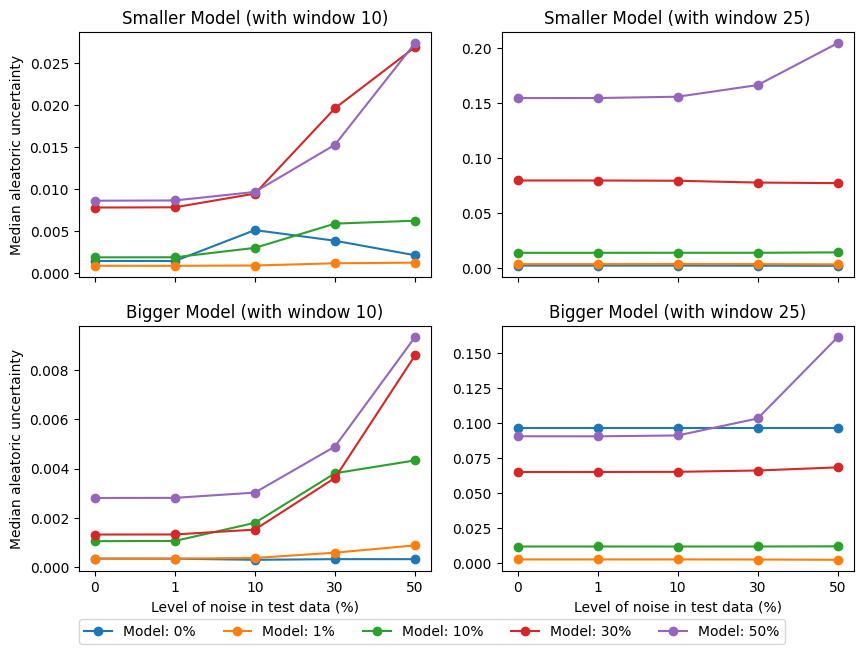

In [5]:
fig, axs = plt.subplots(2,2, sharex='col', figsize=(10,7))

for noise_level in noise_levels:
    for i, (hidden_dim, encoding_dim) in enumerate(zip(hidden_dims, encoding_dims)):
        for j, window_size in enumerate(window_sizes):
            au_test_noise_levels = []
            for test_noise_level in noise_levels:
                path = f'sine-noise-{noise_level}%/{hidden_dim}-{encoding_dim}/window_size_{window_size}/test/sine-noise-{test_noise_level}%'
                aleatoric_uncertainty = torch.load(f'{path}/data/aleatoric_uncertainty.pt')
                au_test_noise_levels.append(aleatoric_uncertainty)    
                
            if hidden_dim == 50:
                axs[i,j].set_title(f'Smaller Model (with window {window_size})')
            else:
                axs[i,j].set_title(f'Bigger Model (with window {window_size})')
            axs[i,j].plot(list(map(str, map(int,noise_levels))), [ae.median().item() for ae in au_test_noise_levels], marker='o')

axs[1,0].set_xlabel('Level of noise in test data (%)')
axs[1,1].set_xlabel('Level of noise in test data (%)')
axs[1,0].set_ylabel('Median aleatoric uncertainty')
axs[0,0].set_ylabel('Median aleatoric uncertainty')

labels = ["Model: 0%", "Model: 1%", "Model: 10%", "Model: 30%", "Model: 50%"]
fig.legend(labels=labels, loc='lower center', ncol=5)

plt.savefig("au_vs_noise.pdf")
plt.show()

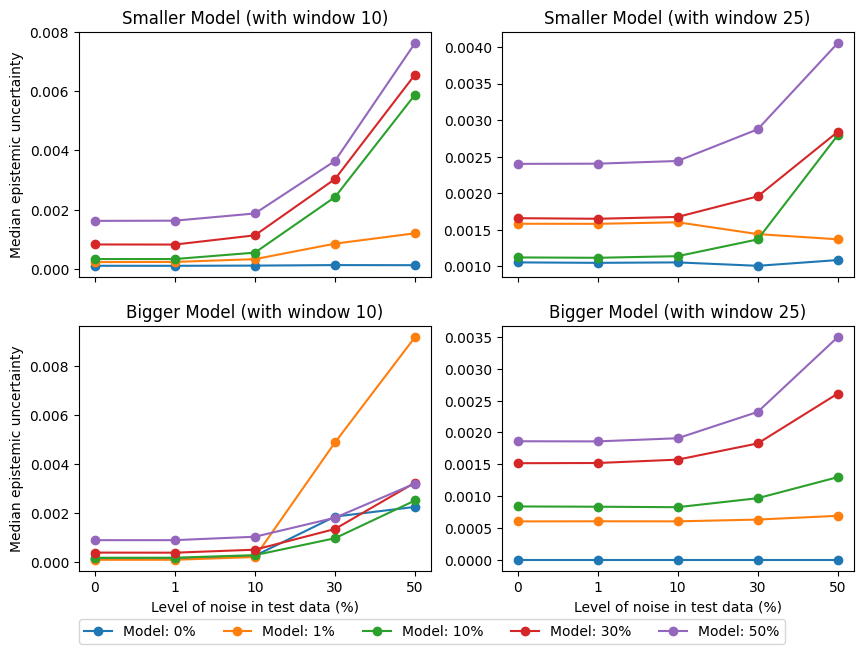

In [7]:
fig, axs = plt.subplots(2,2, sharex='col', figsize=(10,7))

epistemic_uncertainties = []

for noise_level in noise_levels:
    for i, (hidden_dim, encoding_dim) in enumerate(zip(hidden_dims, encoding_dims)):
        for j, window_size in enumerate(window_sizes):
            eu_test_noise_levels = []
            for test_noise_level in noise_levels:
                path = f'sine-noise-{noise_level}%/{hidden_dim}-{encoding_dim}/window_size_{window_size}/test/sine-noise-{test_noise_level}%'
                epistemic_uncertainty = torch.load(f'{path}/data/epistemic_uncertainty.pt')
                eu_test_noise_levels.append(epistemic_uncertainty)    
                
            if hidden_dim == 50:
                axs[i,j].set_title(f'Smaller Model (with window {window_size})')
            else:
                axs[i,j].set_title(f'Bigger Model (with window {window_size})')
            axs[i,j].plot(list(map(str, map(int,noise_levels))), [ae.median().item() for ae in eu_test_noise_levels], marker="o")

axs[1,0].set_xlabel('Level of noise in test data (%)')
axs[1,1].set_xlabel('Level of noise in test data (%)')
axs[1,0].set_ylabel('Median epistemic uncertainty')
axs[0,0].set_ylabel('Median epistemic uncertainty')
labels = ["Model: 0%", "Model: 1%", "Model: 10%", "Model: 30%", "Model: 50%"]
fig.legend(labels=labels, loc='lower center', ncol=5)
plt.savefig("eu_vs_noise.pdf")
plt.show()

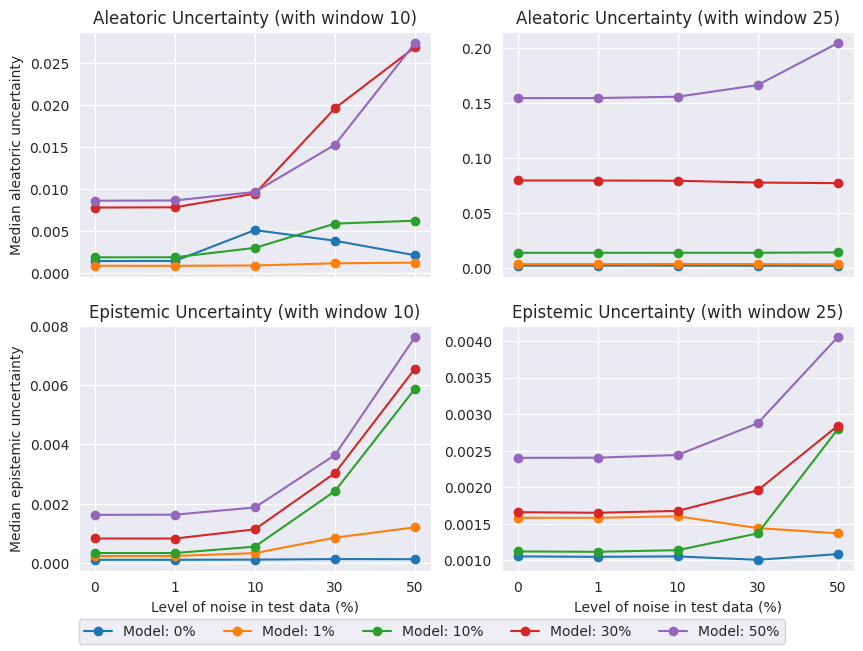

In [16]:
fig, axs = plt.subplots(2,2, sharex='col', figsize=(10,7))

uncertainty_types = ["aleatoric", "epistemic"]

for noise_level in noise_levels:
    for i, uncertainty_type in enumerate(uncertainty_types):
        for j, window_size in enumerate(window_sizes):
            
            test_noise_levels = []
            for test_noise_level in noise_levels:
                path = f'sine-noise-{noise_level}%/50-40/window_size_{window_size}/test/sine-noise-{test_noise_level}%'
                aleatoric_uncertainty = torch.load(f'{path}/data/{uncertainty_type}_uncertainty.pt')
                test_noise_levels.append(aleatoric_uncertainty)
                
            axs[i,j].set_title(f'{uncertainty_type.title()} Uncertainty (with window {window_size})')
            axs[i,j].plot(list(map(str, map(int,noise_levels))), [tn.median().item() for tn in test_noise_levels], marker='o')
            

axs[1,0].set_xlabel('Level of noise in test data (%)')
axs[1,1].set_xlabel('Level of noise in test data (%)')
axs[0,0].set_ylabel('Median aleatoric uncertainty')
axs[1,0].set_ylabel('Median epistemic uncertainty')

labels = ["Model: 0%", "Model: 1%", "Model: 10%", "Model: 30%", "Model: 50%"]
fig.legend(labels=labels, loc='lower center', ncol=5)

plt.savefig("uncertainties_vs_noise.pdf")
plt.show()